In [1]:
skin<-read.csv("C:/Users/fadhi/Desktop/Stat 517/Final Project/Skin_HAM10000.csv")

In [2]:
library(tidyverse)
library(factoextra)
library(cluster)
library(NbClust) 
library(fpc) 
library(dendroextras)
library(dendextend) 
library(mclust)  
library(dbscan)
library(dplyr)
library(arulesViz)
library(arulesCBA)
library(arules)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.0.0     v purrr   0.2.5
v tibble  1.4.2     v dplyr   0.7.6
v tidyr   0.8.1     v stringr 1.3.1
v readr   1.1.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ

Attaching package: 'dendroextras'

The following object is masked from 'package:dplyr':

    slice


---------------------
Welcome to dendextend version 1.8.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPa

In [3]:
for (i in 2:ncol(skin)){
  skin[is.na(skin[,i]),i]<-median(skin[,i],na.rm = TRUE)
}

In [4]:
sk <- skin[1:192] # Removing label information
sk

pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0182,pixel0183,pixel0184,pixel0185,pixel0186,pixel0187,pixel0188,pixel0189,pixel0190,pixel0191
199,156,188,210,165,198,216,176,203,215,...,189,214,167,191,199,157,175,184,143,167
115,87,115,180,133,158,200,153,187,215,...,199,207,167,188,177,128,138,74,51,60
203,146,164,209,144,153,217,160,181,215,...,189,211,160,175,199,152,172,177,138,158
135,96,110,198,141,156,208,148,158,210,...,149,179,141,157,153,122,138,58,39,46
204,156,187,232,185,216,236,196,220,217,...,212,236,189,213,233,182,209,207,175,188
26,13,18,175,147,152,247,220,231,248,...,131,207,151,184,101,69,84,2,0,0
201,156,149,204,157,150,206,155,151,209,...,175,217,168,172,214,166,169,211,162,166
174,129,118,189,139,136,201,147,140,207,...,164,206,160,161,197,151,146,133,97,91
175,122,127,199,138,152,214,159,181,219,...,168,202,140,155,195,134,144,121,80,83
220,163,175,216,152,169,230,172,187,232,...,204,234,180,198,227,167,181,218,146,155


In [5]:
par(mfrow=c(1,2))
skin.s=scale(sk)
skin.p=prcomp(sk[,-1],scale=FALSE)
# Loading the principal components
skin.p$rotation[1:10,1:10]
# Generating the rotation matrix for analysis

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
pixel0001,-0.06852568,-0.101226065,-0.03570786,-0.095394502,-0.03317077,0.029126338,-0.024528203,0.13600102,-0.02212420,0.113579884
pixel0002,-0.07362529,-0.106848460,-0.04794617,-0.113800337,-0.02786282,0.035705046,-0.048956141,0.15813674,-0.06170208,0.140215418
pixel0003,-0.03884386,-0.115059329,0.07519149,-0.011435139,-0.04287635,0.001245541,0.008780373,0.08648609,0.01212326,0.022823761
pixel0004,-0.07048640,-0.051814995,-0.05124002,-0.054147407,-0.03354211,0.023539843,0.017583408,0.08251152,0.04472038,-0.004809489
pixel0005,-0.07603626,-0.053496278,-0.06275227,-0.068542726,-0.02833289,0.030468371,-0.004679956,0.10301983,0.01000942,0.013941238
pixel0006,-0.03842693,-0.086605592,0.07364455,0.019249573,-0.04580537,0.002201779,0.043795545,0.05254560,0.02320352,-0.028040937
pixel0007,-0.07340829,-0.020313774,-0.05433814,-0.016544582,-0.04363301,0.028807418,0.064828251,0.05438628,0.04886086,-0.057873933
pixel0008,-0.07961111,-0.018122270,-0.06578184,-0.025960527,-0.04062600,0.036021954,0.047840314,0.07461751,0.01499901,-0.045433507
pixel0009,-0.04080622,-0.074595409,0.07977247,0.034948333,-0.04170463,0.014345235,0.071823646,0.02669382,0.01512611,-0.015436313
pixel0010,-0.07800191,-0.003831985,-0.04700707,0.006453828,-0.04074602,0.049980026,0.108889354,0.02202261,0.03524642,-0.030112089


In [6]:
sk.sd=skin.p$sdev
sk.var=skin.p$sdev^2 
sk.var[1:5]
# Computing standard deviation and variance for each principal component
pvar=sk.var/sum(sk.var) 
which.max(cumsum(pvar)[cumsum(pvar)<0.95])
which.max(cumsum(pvar)[cumsum(pvar)<0.98])
which.max(cumsum(pvar)[cumsum(pvar)<0.80])
# Calculating the number of PC's required to retain 80, 95 and 98 percent of the total variance

[1] 73057.222 50176.698 29273.366  9745.368  9008.878

[1] 20

[1] 38

[1] 5

[1] 5.67907e-05

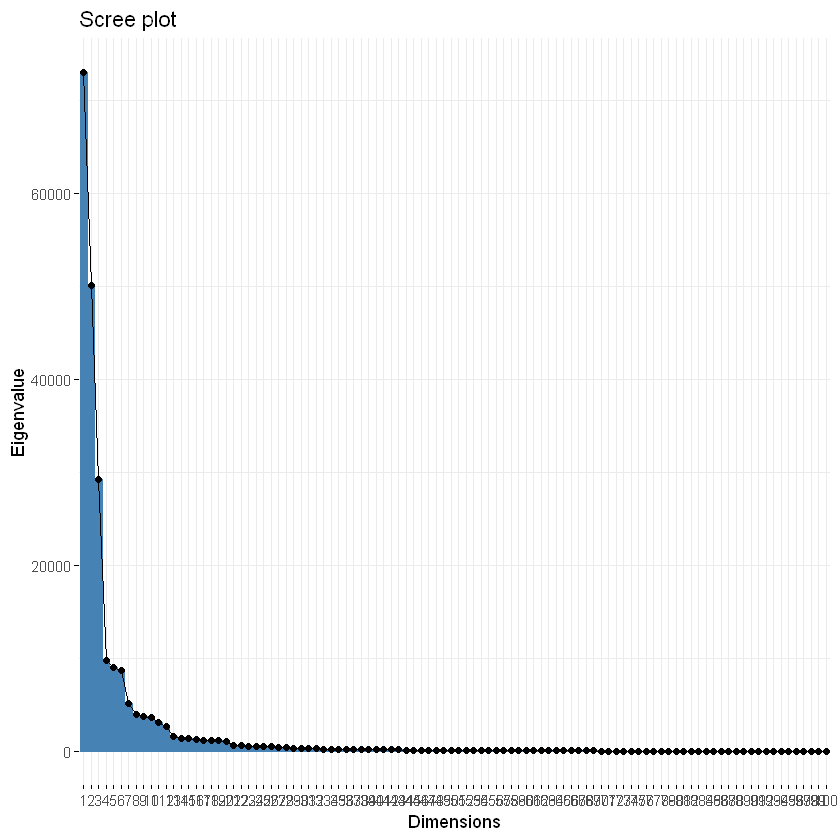

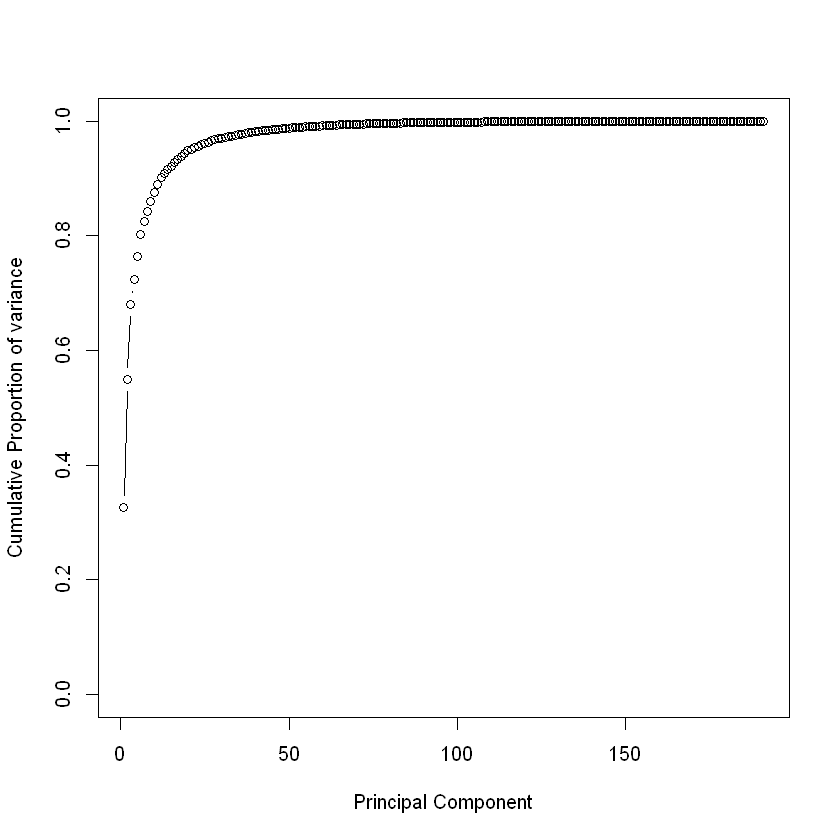

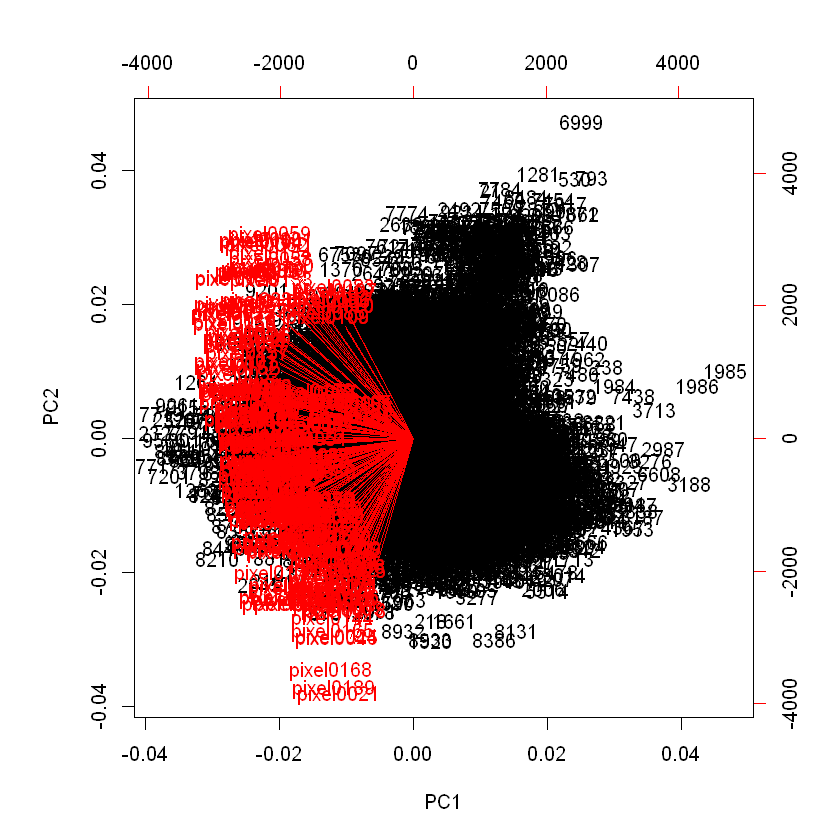

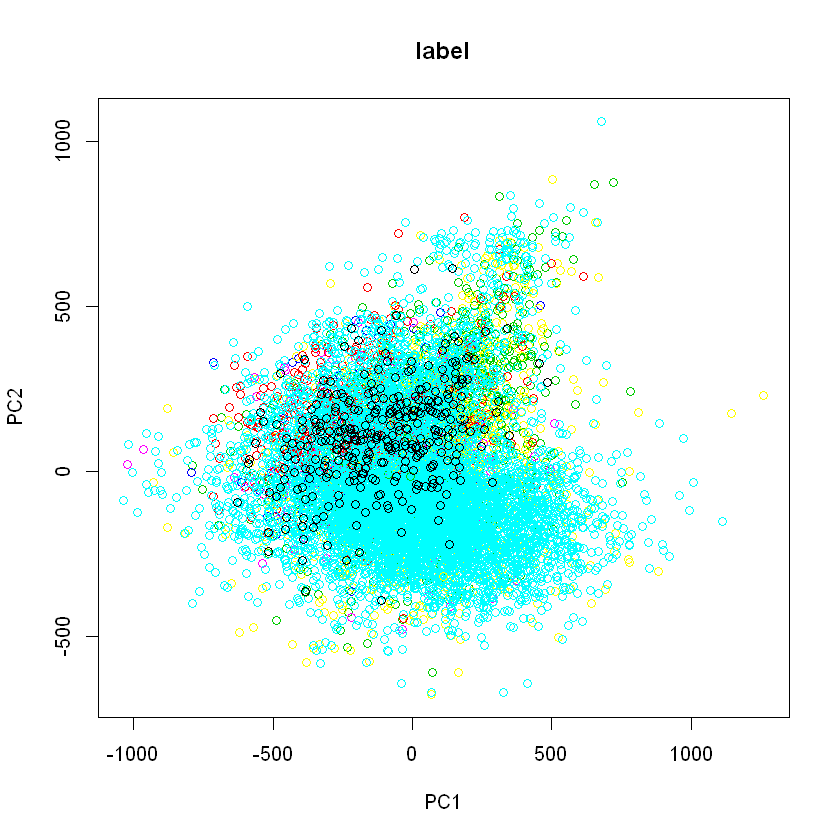

In [7]:
# First 20 principal components
cumsum(pvar[100])
fviz_screeplot(skin.p,ncp=100,choice="eigenvalue")
plot(cumsum(pvar),xlab="Principal Component", 
   ylab="Cumulative Proportion of variance",ylim=c(0,1),type='b')
biplot(skin.p,arrow.len=0) 
# Arrow head length is suppressed to get rid of the errors of indeterminate angle
skingroups1<- factor(skin$label)
plot(main="label",skin.p$x[,1:100],col=skingroups1)
skin_new1=skin.p$x[,1:100]
skin_new1.s=scale(skin_new1)

In [8]:
results <- kmeans(skin.s, 7)
results

K-means clustering with 7 clusters of sizes 1608, 938, 1931, 1381, 1134, 1126, 1897

Cluster means:
    pixel0000  pixel0001   pixel0002  pixel0003  pixel0004   pixel0005
1  0.85227524  0.4644020  0.44957986  0.9837558  0.3484310  0.34178009
2  0.32639836 -0.4031725 -0.39558475  0.1509866 -0.9523704 -0.93529884
3 -0.52420696 -0.1046033 -0.11650979 -0.5760222  0.1121366  0.09823953
4 -1.59069152 -1.3625391 -1.33651845 -1.6084586 -1.0785716 -1.04269440
5 -0.04468226  0.5777357  0.62345628 -0.1405600  0.6820667  0.70900497
6  0.36989500  1.0475349  1.01717291  0.4911198  1.3711880  1.31369686
7  0.61493742 -0.0630488 -0.07036882  0.6412598 -0.3750150 -0.37176908
    pixel0006  pixel0007  pixel0008  pixel0009  pixel0010  pixel0011  pixel0012
1  1.05674491  0.2708918  0.2649960  1.0760362  0.2688314  0.2616799  1.0787433
2 -0.06030169 -1.3163592 -1.2948705 -0.1828405 -1.4453325 -1.4124175 -0.1740141
3 -0.57668261  0.2638211  0.2603341 -0.5240847  0.3527014  0.3499441 -0.5269201
4 -1.4816461

$names
[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

$class
[1] "kmeans"

[1] 1583 1540 1133 1153 1564  567 2475

[1] 1148122975

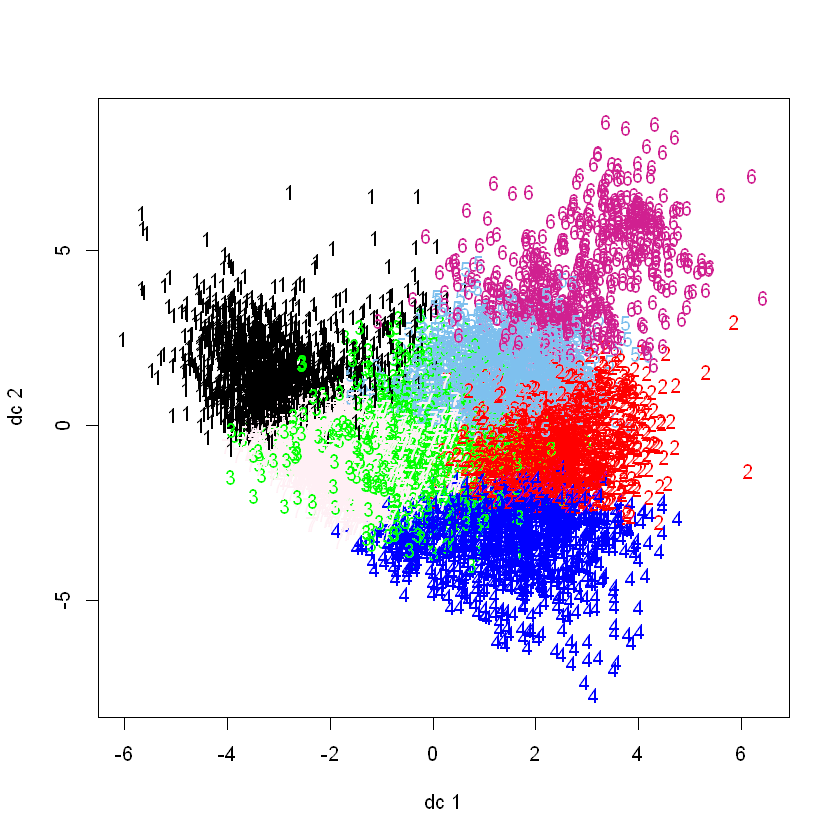

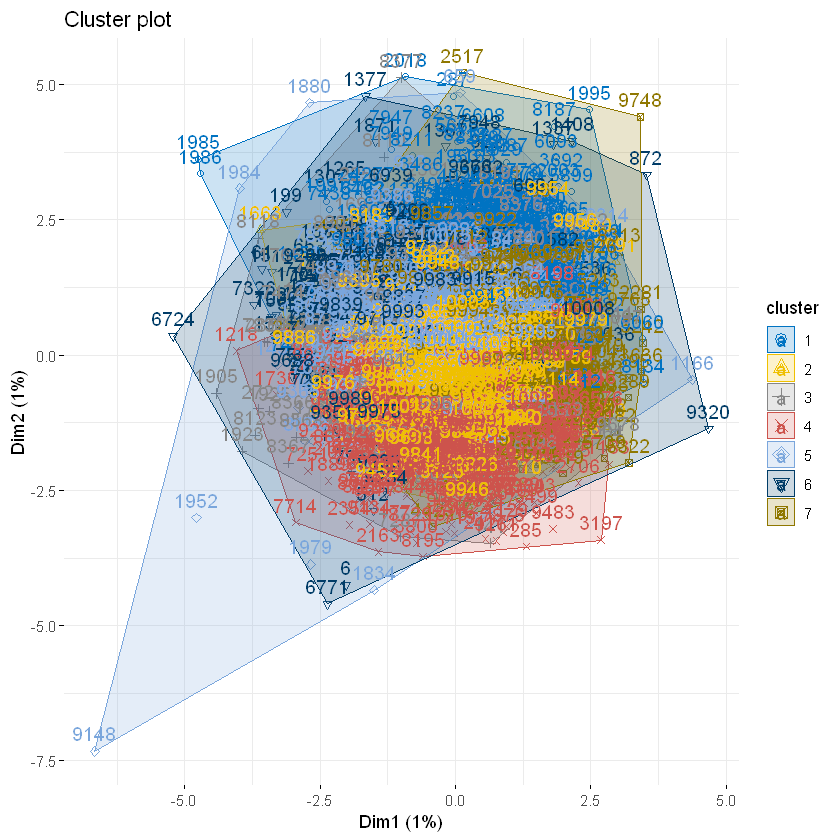

In [9]:
set.seed(10)
kmeans100_7.fit=kmeans(skin_new1,7,nstart=50)
attributes(kmeans100_7.fit)
kmeans100_7.fit$size
kmeans100_7.fit$tot.withinss
plotcluster(skin_new1,kmeans100_7.fit$cluster)
fviz_cluster(kmeans100_7.fit,data=skin_new1,ellipse.type="convex",palette="jco",ggtheme=theme_minimal())

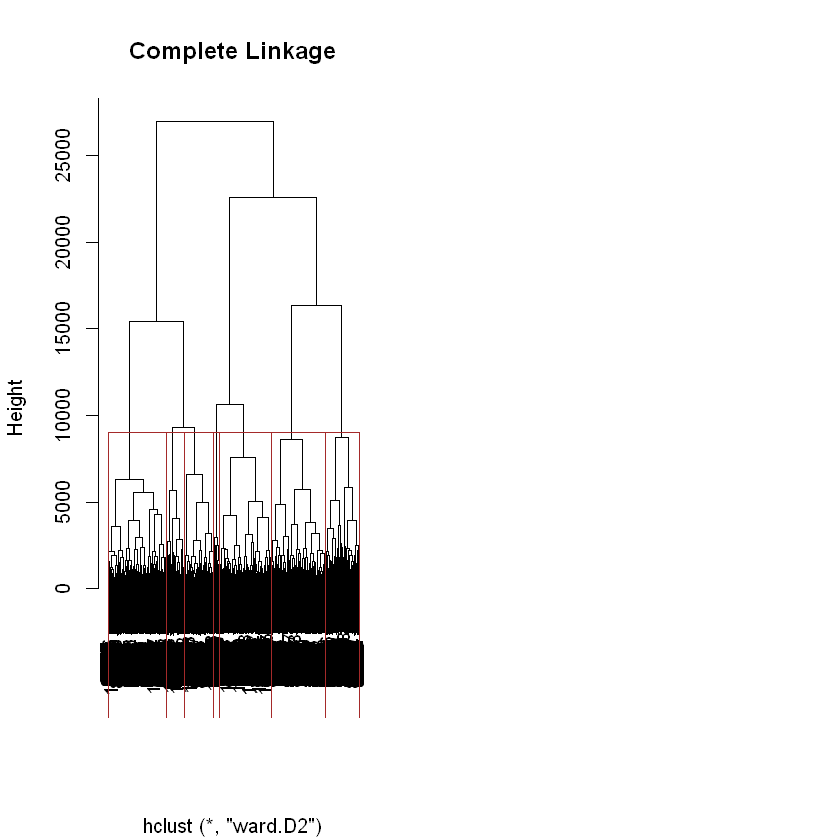

In [10]:
par(mfrow=c(1,2))
#Hierarchial Clustering with K=7
skhc_ward=hclust(dist(skin_new1,method="euclidean"),method="ward.D2")
plot(skhc_ward, main="Complete Linkage",xlab="",cex=.9) #Dendogram
rect.hclust(skhc_ward,k=7,border="Brown") #Bordering the clusters

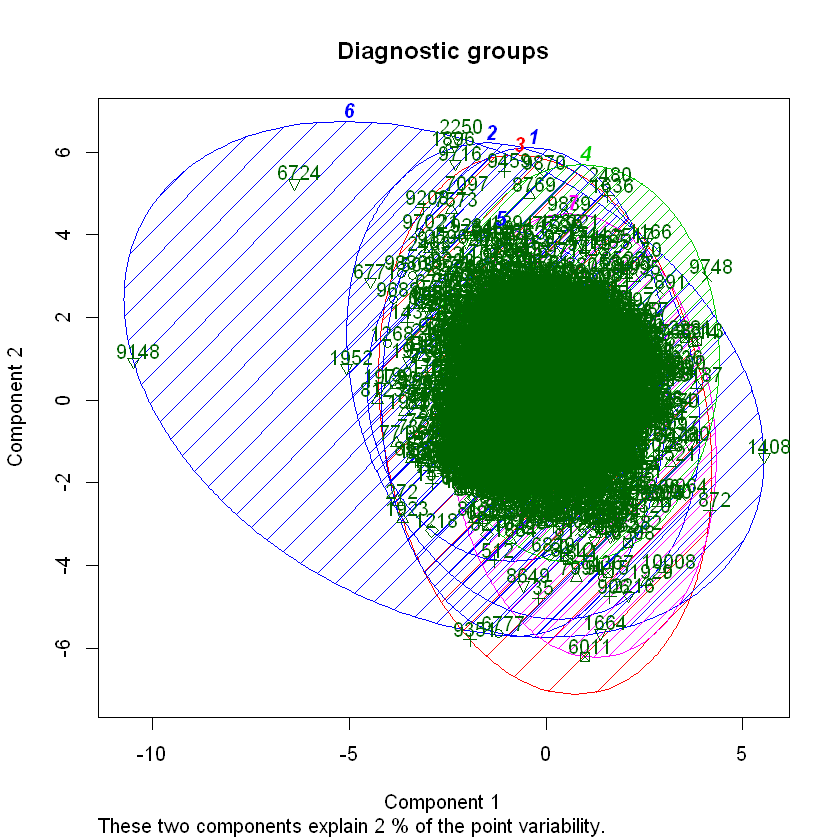

In [11]:
clust_7=cutree(skhc_ward,7)#Cut Tree into 7 clusters
clusplot(skin_new1,clust_7,color=TRUE, shade = TRUE, labels=2, lines=0, main='Diagnostic groups')

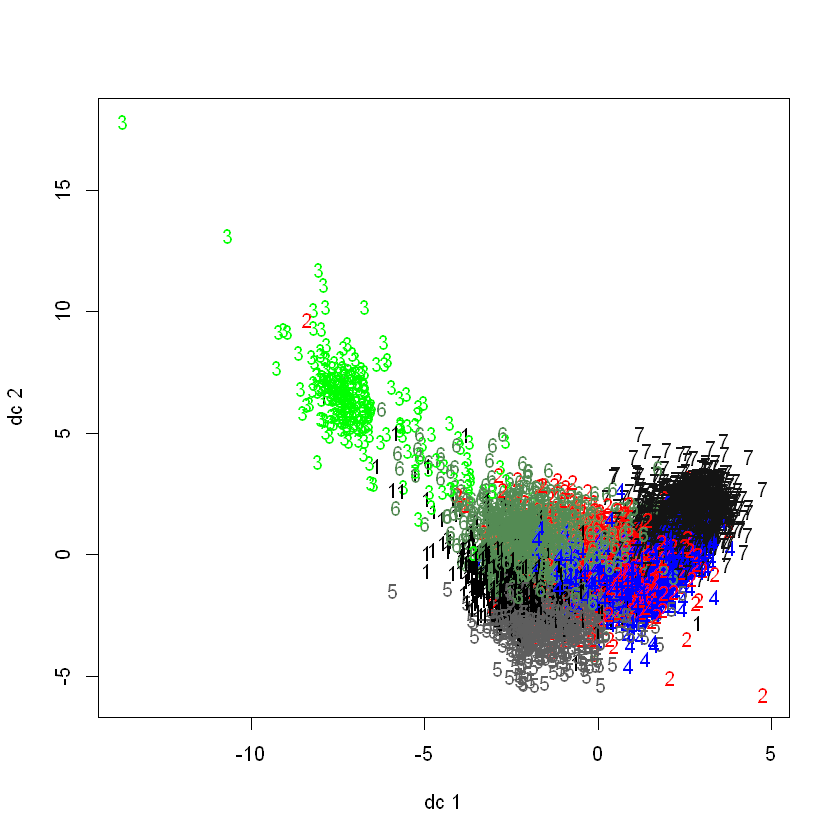

In [12]:
plotcluster(skin_new1,clust_7)

In [13]:
# Generating the optimal number of clusters
par(mfrow=c(1,3))
sk_fit<-Mclust(skin.s[,0:50])
summary(sk_fit)
sk_fit$modelName
sk_fit$G

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEV (ellipsoidal, equal shape) model with 7 components: 

 log.likelihood     n   df      BIC      ICL
       328301.2 10015 8987 573815.6 573339.6

Clustering table:
   1    2    3    4    5    6    7 
2032 1995 1695 1965  953 1230  145 

[1] "VEV"

[1] 7

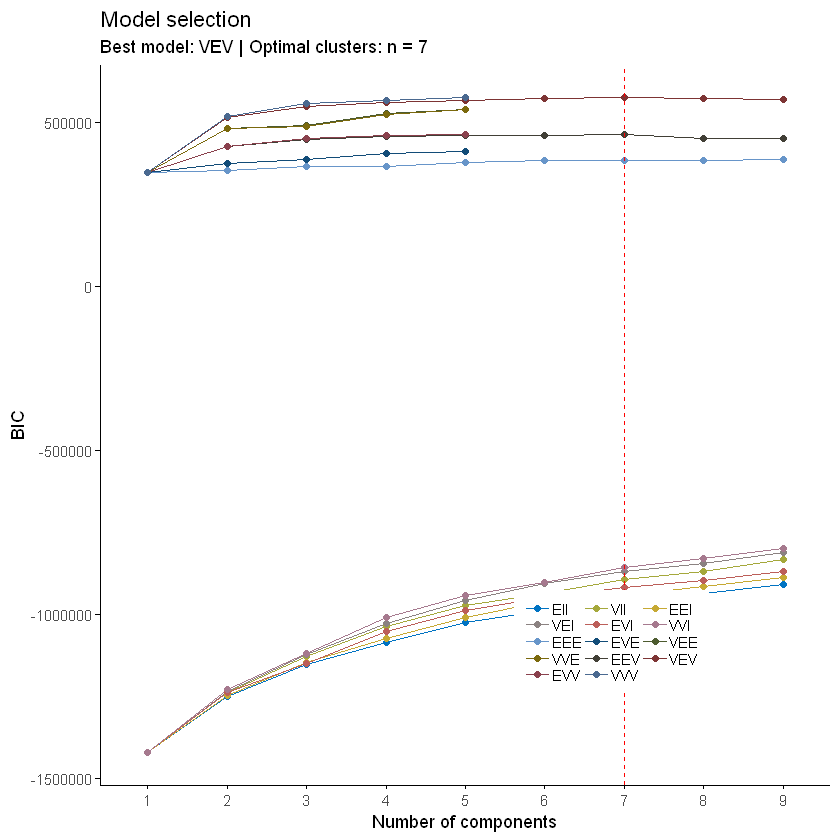

In [14]:
fviz_mclust(sk_fit,"BIC",palette="jco")

In [ ]:
# To generate the number of optimal clusters 
# Methods used (PC 1 - PC 20): NbClust, WSS, Gap statistic, and Silhouette
set.seed(10)
sk.nbclust<-skin.s %>% 
  scale() %>%
  NbClust(distance="euclidean",min.nc=2,max.nc=8,method="complete",index="all")
fviz_nbclust(skin.s,kmeans,method="wss") 
fviz_nbclust(skin.s,kmeans,method="gap_stat") 
fviz_nbclust(skin.s,kmeans,method="silhouette") 